### Table of contents:
1. [Downloading Data](#downloading)
2. [EDA and preprocessing](#eda)
3. [Modeling](#modeling)
4. [2nd Pass - EDA and preprocessing](#eda2)
5. [2nd Pass - Modeling](#model2)
6. [Summary](#summary)

Imports:

In [8]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

import warnings
import gc

warnings.simplefilter(action='ignore', category='DeprecationWarning')
warnings.simplefilter(action='ignore', category='FutureWarning')

sns.set_style('white')
%matplotlib inline

np.random.seed(42)

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 200)

<a name="downloading"></a>
__1. Downloading data__

In [6]:
!wget 'https://www.kaggle.com/wendykan/lending-club-loan-data/downloads/lending-club-loan-data.zip'

--2019-04-11 20:45:57--  https://www.kaggle.com/wendykan/lending-club-loan-data/downloads/lending-club-loan-data.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?returnUrl=%2Fwendykan%2Flending-club-loan-data%2Fdata [following]
--2019-04-11 20:45:58--  https://www.kaggle.com/account/login?returnUrl=%2Fwendykan%2Flending-club-loan-data%2Fdata
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘lending-club-loan-data.zip’

lending-club-loan-d     [ <=>                ]   8,33K  --.-KB/s    in 0,003s  

2019-04-11 20:45:58 (2,82 MB/s) - ‘lending-club-loan-data.zip’ saved [8535]



In [13]:
!ls -la

total 719244
drwxr-xr-x  3 karol karol      4096 04-11 20:57  .
drwxr-xr-x 11 karol karol      4096 04-11 20:41  ..
drwxr-xr-x  2 karol karol      4096 04-11 20:42  .ipynb_checkpoints
-rw-r--r--  1 karol karol 736483000 04-11 20:57  lending-club-loan-data.zip
-rw-r--r--  1 karol karol      3773 04-11 20:50 'Loan Default Prediction.ipynb'


In [14]:
!unzip lending-club-loan-data.zip

Archive:  lending-club-loan-data.zip
  inflating: LCDataDictionary.xlsx   
  inflating: database.sqlite         
  inflating: loan.csv                


In [15]:
!ls -la

total 3162180
drwxr-xr-x  3 karol karol       4096 04-11 20:57  ./
drwxr-xr-x 11 karol karol       4096 04-11 20:41  ../
----------  1 karol karol 1312145408 03-18 18:44  database.sqlite
drwxr-xr-x  2 karol karol       4096 04-11 20:42  .ipynb_checkpoints/
----------  1 karol karol      23582 03-18 18:44  LCDataDictionary.xlsx
-rw-r--r--  1 karol karol  736483000 04-11 20:57  lending-club-loan-data.zip
----------  1 karol karol 1189395649 03-18 18:45  loan.csv
-rw-r--r--  1 karol karol       3773 04-11 20:50 'Loan Default Prediction.ipynb'


In [19]:
!chmod 700 loan.csv LCDataDictionary.xlsx database.sqlite

Loading CSV

In [9]:
data = pd.read_csv('loan.csv', low_memory=False)

In [3]:
data_dict = pd.read_excel('LCDataDictionary.xlsx')

In [4]:
data_dict.shape

(153, 2)

In [5]:
data_dict.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [20]:
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [3]:
data.shape

(2260668, 145)

Checking Database

In [51]:
import sqlite3

In [53]:
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [56]:
print(c.execute("SELECT name FROM sqlite_master").fetchall())

[('loan',)]


In [59]:
c.execute("PRAGMA TABLE_INFO (loan)").fetchall()

[(0, 'id', '', 0, None, 0),
 (1, 'member_id', '', 0, None, 0),
 (2, 'loan_amnt', '', 0, None, 0),
 (3, 'funded_amnt', '', 0, None, 0),
 (4, 'funded_amnt_inv', '', 0, None, 0),
 (5, 'term', '', 0, None, 0),
 (6, 'int_rate', '', 0, None, 0),
 (7, 'installment', '', 0, None, 0),
 (8, 'grade', '', 0, None, 0),
 (9, 'sub_grade', '', 0, None, 0),
 (10, 'emp_title', '', 0, None, 0),
 (11, 'emp_length', '', 0, None, 0),
 (12, 'home_ownership', '', 0, None, 0),
 (13, 'annual_inc', '', 0, None, 0),
 (14, 'verification_status', '', 0, None, 0),
 (15, 'issue_d', '', 0, None, 0),
 (16, 'loan_status', '', 0, None, 0),
 (17, 'pymnt_plan', '', 0, None, 0),
 (18, 'url', '', 0, None, 0),
 (19, 'desc', '', 0, None, 0),
 (20, 'purpose', '', 0, None, 0),
 (21, 'title', '', 0, None, 0),
 (22, 'zip_code', '', 0, None, 0),
 (23, 'addr_state', '', 0, None, 0),
 (24, 'dti', '', 0, None, 0),
 (25, 'delinq_2yrs', '', 0, None, 0),
 (26, 'earliest_cr_line', '', 0, None, 0),
 (27, 'inq_last_6mths', '', 0, None, 0),


Looks like it's the same data as in csv file.

In [60]:
!rm database.sqlite

<a name="eda"></a>
__2. EDA__

In [11]:
data.shape

(2260668, 145)

In [12]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260663,NaN,NaN,12000,12000,12000.0,60 months,14.08,279.72,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260664,NaN,NaN,12000,12000,12000.0,60 months,25.82,358.01,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260665,NaN,NaN,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260666,NaN,NaN,12000,12000,12000.0,60 months,21.45,327.69,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260667,NaN,NaN,16550,16550,16550.0,60 months,21.45,451.94,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


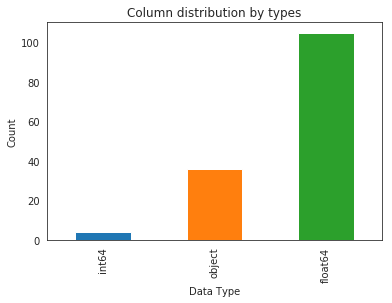

In [15]:
data.dtypes.value_counts().sort_values().plot(kind='bar')
plt.title('Column distribution by types')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()

Initial exploratory data analysis. Starting with predicted variable - 'loan_status'.

In [9]:
data.loan_status.describe()

count        2260668
unique             9
top       Fully Paid
freq         1041952
Name: loan_status, dtype: object

In [10]:
data.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [3]:
d_1 = 'Default'
d_2 = 'Does not meet the credit policy. Status:Charged Off'
d_3 = 'Late (31-120 days)'
d_4 = 'Charged Off'

ones = data.query('loan_status == ["{}", "{}", "{}", "{}"]'.format(d_1, d_2, d_3, d_4)).shape[0]
zeros = data.shape[0] - ones

print("Percentage of events (defaults) in dataset: {:.3f}%".format(ones/data.shape[0]*100))

Percentage of events (defaults) in dataset: 12.578%


Looks like a slighlty imbalanced dataset, however a lot better than most datasets for banking, which usually have somewhere around 0.5 - 1 percent events (churns, defaults etc.)

__Missing values:__

In [27]:
data.isnull().sum().sort_values(ascending=False)

id                                            2260668
member_id                                     2260668
url                                           2260668
orig_projected_additional_accrued_interest    2252242
hardship_start_date                           2250055
hardship_end_date                             2250055
payment_plan_start_date                       2250055
hardship_length                               2250055
hardship_dpd                                  2250055
hardship_loan_status                          2250055
hardship_payoff_balance_amount                2250055
deferral_term                                 2250055
hardship_last_payment_amount                  2250055
hardship_status                               2250055
hardship_reason                               2250055
hardship_type                                 2250055
hardship_amount                               2250055
settlement_percentage                         2227612
settlement_term             

In [15]:
missing_columns = data.isnull().any(axis=0).sort_values(ascending=False)

In [29]:
missing_columns[missing_columns == True].index

Index(['settlement_term', 'inq_fi', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m',
       ...
       'pct_tl_nvr_dlq', 'num_tl_120dpd_2m', 'tax_liens',
       'sec_app_earliest_cr_line', 'total_bc_limit',
       'total_il_high_credit_limit', 'pub_rec_bankruptcies',
       'total_bal_ex_mort', 'revol_bal_joint', 'tot_hi_cred_lim'],
      dtype='object', length=113)

Well, that's a lot of missing data.  
Columns ID, MEMBER_ID and URL are completely missing - they are unique identifiers, most likely generated from sequence and wouldn't add any value anyways. Can be safely dropped.  

Next set of values pertains to hardship plan - period of paying only interests instead of full monthly amount. Makes sense that if most customers don't have to use this option there will be plenty of missing values. Indicator variable HARDSHIP_FLAG (which has no missing values) may be useful but other variables describing this state may be dropped.  

At this point looking at all other variables, one by one, is a waste of time. If I will need to improve models I may come back to careful inspection of these variables but for the time being I will drop all columns that have more than 65% of missing values and impute missing values for the rest of remaining columns.

In [10]:
# making copy of dataframe
df = data.copy()

In [11]:
df = df.dropna(thresh=0.65 * df.shape[0], axis=1)

In [31]:
df.shape

(2260668, 87)

__Encoding target variable__

In [42]:
df.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [12]:
d_1 = 'Default'
d_2 = 'Does not meet the credit policy. Status:Charged Off'
d_3 = 'Late (31-120 days)'
d_4 = 'Charged Off'

n_1 = 'Fully Paid'
n_2 = 'Current'
n_3 = 'In Grace Period'
n_4 = 'Late (16-30 days)'
n_5 = 'Does not meet the credit policy. Status:Fully Paid'

df['target'] = df.loan_status.map({d_1:1, d_2:1, d_3:1, d_4:1, n_1:0, n_2:0, n_3:0, n_4:0, n_5:0})

In [45]:
df.target.value_counts()[1] / df.shape[0]

0.1257787521210545

In [13]:
df.drop('loan_status', axis=1, inplace=True)

In [78]:
for c, t in zip(df.columns, df.dtypes):
    if t=='object':
        print(c, df[c].nunique())

term 2
grade 7
sub_grade 35
emp_title 512694
emp_length 11
home_ownership 6
verification_status 3
issue_d 139
pymnt_plan 2
purpose 14
title 63155
zip_code 956
addr_state 51
earliest_cr_line 754
initial_list_status 2
last_pymnt_d 135
last_credit_pull_d 140
application_type 2
hardship_flag 2
disbursement_method 2
debt_settlement_flag 2


I will be dropping columns with lots of unique values, since they can't be converted to label encoding or one-hot encoding without creating insane amount of empty columns. I will also check columns with more than 100 values since they seem to be datetime objects.

I will take a look at grade since that means overall quality of loan and risk of default.

In [14]:
df.drop(['sub_grade', 'emp_title', 'title', 'zip_code', 'addr_state'], axis=1, inplace=True)

In [24]:
df.grade.value_counts().sort_index()

A    433027
B    663557
C    650053
D    324424
E    135639
F     41800
G     12168
Name: grade, dtype: int64

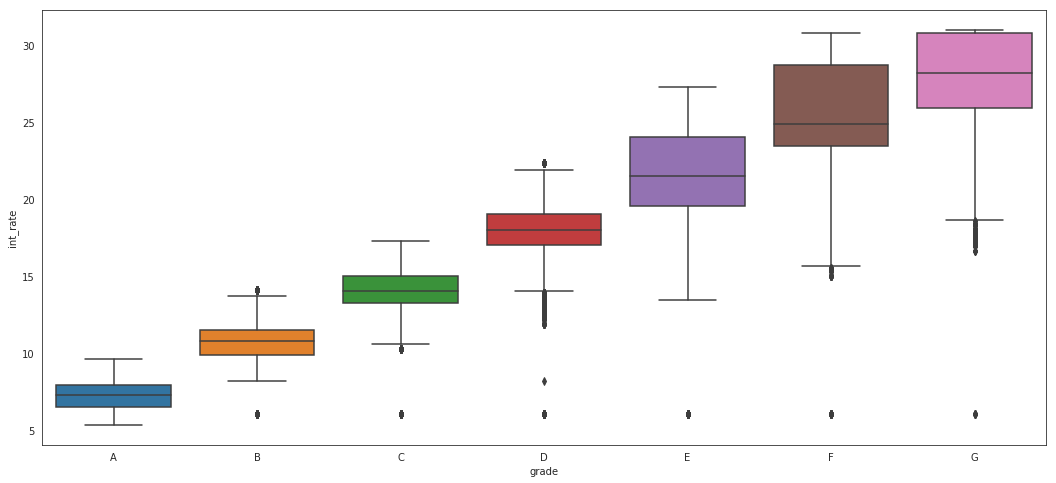

In [29]:
fig = plt.figure(figsize=(18,8))
sns.boxplot(y='int_rate', x='grade', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

Encoding grade with numeric values

In [15]:
grades = df.grade.unique()
grades.sort()
grade_dict = dict(zip(grades, np.arange(len(grades))[::-1]))

In [16]:
df['grade'] = df.grade.map(grade_dict)

Converting months to numeric value - number of months from earliest credit line to date of issuance of credit by Lending Club.

In [86]:
df.earliest_cr_line.isnull().sum()

29

In [79]:
df.earliest_cr_line.value_counts()

Sep-2004    15400
Sep-2003    15215
Sep-2005    14780
Aug-2003    14669
Aug-2004    14413
Aug-2001    14355
Aug-2002    14322
Aug-2005    14207
Aug-2006    14143
Oct-2003    14108
Sep-2002    13823
Oct-2004    13602
Aug-2000    13497
Oct-2002    13437
Oct-2001    13424
Jul-2003    13243
Oct-2000    12909
Nov-2004    12527
Jul-2004    12376
Sep-2000    12252
Nov-1999    12209
Nov-2000    12135
Oct-2005    12128
Sep-2001    12066
Nov-2001    11880
Mar-2004    11854
Sep-2006    11842
Jun-2005    11783
Nov-2003    11728
Oct-1999    11665
Jul-2002    11606
Aug-1999    11541
Nov-2002    11452
Dec-2004    11371
Nov-2005    11354
May-2003    11336
Sep-1999    11330
Aug-2007    11313
Jul-2001    11225
May-2004    11148
Mar-2005    11141
Dec-2001    11108
Jul-2005    11075
Jun-2004    11075
Mar-2001    11051
Dec-2003    10943
Jun-2003    10890
Mar-2003    10780
May-2005    10733
Apr-2004    10633
Mar-2006    10632
May-2001    10612
Dec-2000    10609
Jun-2001    10598
May-2002    10597
Jun-2006  

In [88]:
df.issue_d.value_counts()

Mar-2016    61992
Oct-2015    48631
May-2018    46311
Oct-2018    46305
Aug-2018    46079
Jul-2015    45962
Dec-2015    44343
Aug-2017    43573
Jul-2018    43089
Apr-2018    42928
Nov-2017    42343
Nov-2018    41973
Jun-2018    41533
Dec-2018    40134
Sep-2017    39713
Feb-2016    39529
Jul-2017    39415
Sep-2018    39026
Oct-2014    38783
Mar-2018    38771
Dec-2017    38154
Oct-2017    38151
Jun-2017    38087
May-2017    37681
Nov-2015    37530
Mar-2017    37181
Apr-2016    36432
Jan-2018    36347
Aug-2016    36280
Dec-2016    36183
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
Jul-2016    34696
Nov-2016    34591
Jun-2016    33019
Oct-2016    32772
Feb-2018    32746
Jan-2016    32366
May-2015    31913
Jan-2017    31835
Apr-2017    29683
Jul-2014    29306
Sep-2015    28641
Jun-2015    28485
May-2016    28403
Sep-2016    28144
Feb-2017    27763
Mar-2015    25400
Nov-2014    25054
Feb-2015    23770
May-2014    19099
Apr-2014    19071
Aug-2014    18814
Jun-2014    17179
Mar-2014  

In [37]:
#df['cr_months'] = (pd.to_datetime(df.issue_d) - pd.to_datetime(df.earliest_cr_line))/np.timedelta64(1, 'M')

In [38]:
#df['cr_months'] = SimpleImputer(strategy='most_frequent').fit_transform(np.array(df.cr_months).reshape(-1, 1))

In [17]:
df.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)

In [161]:
df.isnull().sum().sort_values(ascending=False)

mths_since_recent_inq         295435
num_tl_120dpd_2m              153657
emp_length                    146907
mo_sin_old_il_acct            139071
bc_util                        76071
percent_bc_gt_75               75379
bc_open_to_buy                 74935
mths_since_recent_bc           73412
pct_tl_nvr_dlq                 70431
avg_cur_bal                    70346
mo_sin_rcnt_rev_tl_op          70277
num_rev_accts                  70277
mo_sin_old_rev_tl_op           70277
num_actv_rev_tl                70276
num_actv_bc_tl                 70276
mo_sin_rcnt_tl                 70276
num_accts_ever_120_pd          70276
num_il_tl                      70276
total_rev_hi_lim               70276
tot_coll_amt                   70276
num_bc_tl                      70276
tot_cur_bal                    70276
num_op_rev_tl                  70276
num_rev_tl_bal_gt_0            70276
num_tl_30dpd                   70276
num_tl_90g_dpd_24m             70276
num_tl_op_past_12m             70276
t

In [167]:
df.loc[:, df.dtypes == np.object].isnull().sum()

term                         0
grade                        0
sub_grade                    0
emp_length              146907
home_ownership               0
verification_status          0
pymnt_plan                   0
purpose                      0
addr_state                   0
initial_list_status          0
last_pymnt_d              2426
last_credit_pull_d          73
application_type             0
hardship_flag                0
disbursement_method          0
debt_settlement_flag         0
dtype: int64

In [16]:
df.emp_length.value_counts().sort_values(ascending=False)

10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

In [17]:
df.emp_length.unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [18]:
emp_length_values = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years'\
                     , '7 years', '8 years', '9 years', '10+ years']
emp_length_dict = dict(zip(emp_length_values, np.arange(len(emp_length_values))))

In [21]:
emp_length_dict

{'< 1 year': 0,
 '1 year': 1,
 '2 years': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9,
 '10+ years': 10}

In [19]:
df['emp_length'] =  df.emp_length.map(emp_length_dict)

In [20]:
df['emp_length'] = df.emp_length.fillna(0)

Last payment date (last_pymnt_d) is directly correlated with Loan status - I will drop this column.

In [21]:
df.drop('last_pymnt_d', axis=1, inplace=True)

In [22]:
df.drop('last_credit_pull_d', axis=1, inplace=True)

Filling missing values for datetime columns with most frequent values

In [23]:
df['mths_since_recent_inq'] = df.mths_since_recent_inq.fillna(df.mths_since_recent_inq.value_counts().index[0])

In [29]:
df.loc[:, df.dtypes=='float64'].columns.sort_values()

Index(['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'collection_recovery_fee', 'collections_12_mths_ex_med', 'cr_months',
       'delinq_2yrs', 'delinq_amnt', 'dti', 'funded_amnt_inv',
       'inq_last_6mths', 'installment', 'int_rate', 'last_pymnt_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'out_prncp', 'out_prncp_inv',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies',
       'recoveries', 'revol_util', 'tax_liens', 'tot_coll_amt', 'tot_cur_b

In [29]:
df.isnull().sum().sort_values(ascending=False)

num_tl_120dpd_2m              153657
mo_sin_old_il_acct            139071
bc_util                        76071
percent_bc_gt_75               75379
bc_open_to_buy                 74935
mths_since_recent_bc           73412
pct_tl_nvr_dlq                 70431
avg_cur_bal                    70346
mo_sin_rcnt_rev_tl_op          70277
mo_sin_old_rev_tl_op           70277
num_rev_accts                  70277
num_rev_tl_bal_gt_0            70276
num_actv_rev_tl                70276
num_actv_bc_tl                 70276
num_accts_ever_120_pd          70276
num_bc_tl                      70276
num_il_tl                      70276
num_op_rev_tl                  70276
total_rev_hi_lim               70276
mo_sin_rcnt_tl                 70276
num_tl_90g_dpd_24m             70276
num_tl_op_past_12m             70276
tot_hi_cred_lim                70276
total_il_high_credit_limit     70276
tot_cur_bal                    70276
tot_coll_amt                   70276
num_tl_30dpd                   70276
n

All other columns missing have so little missing values that it does not really matter what they are filled with, so I will just fill them with 0, as they are all numeric. 

In [24]:
df = df.fillna(0)

In [25]:
df.shape

(2260668, 78)

Categorical variables have to be encoded - those with only 2 unique values can be encoded with LabelEncoder, those with more than 2 will be encoded with OneHotEncoder

In [26]:
le = LabelEncoder()
label_col_cnt = 0

for col in df.columns:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            df[col] = le.fit_transform(df[col])
            label_col_cnt += 1
            print(col)

print(label_col_cnt)

term
pymnt_plan
initial_list_status
application_type
hardship_flag
disbursement_method
debt_settlement_flag
7


In [20]:
df.loc[:, df.dtypes=='object'].columns

Index(['home_ownership', 'verification_status', 'purpose'], dtype='object')

In [27]:
df = pd.get_dummies(df)

In [28]:
df.shape

(2260668, 98)

<a name='modeling'></a>
3. Modeling

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix

Main metrics are ROC and AUC scores. I do not really care about accuracy, more important are precision and recall. 

In [3]:
from sklearn.linear_model import LogisticRegression

Reference model is logistic regression - fast to compute, easily interpretable but cannot capture non-linear relationships of variables

In [29]:
y = df.target
X = df.drop('target', axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1582467, 97), (1582467,), (678201, 97), (678201,))

In [49]:
len(y_train[y_train==1])/len(y_train)

0.12555080137532093

Standarization

In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [5]:
from sklearn.pipeline import Pipeline

In [32]:
pipe = Pipeline([('rob_sc', RobustScaler())])

X_train_sc = pipe.fit_transform(X_train)

In [33]:
X_test_sc = pipe.transform(X_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=42)
rf.fit(X_train_sc, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [76]:
pred = rf.predict(X_test_sc)

In [77]:
roc_auc_score(pred, y_test)

0.9931417223021768

This seems a little too good, hmm.

In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    592537
           1       1.00      0.91      0.95     85664

   micro avg       0.99      0.99      0.99    678201
   macro avg       0.99      0.96      0.97    678201
weighted avg       0.99      0.99      0.99    678201



In [7]:
from sklearn.neural_network import MLPClassifier

In [64]:
nn = MLPClassifier(hidden_layer_sizes=(5, 5, 5), activation='relu', alpha=0.0001, learning_rate='adaptive', random_state=42)

In [65]:
nn.fit(X_train, y_train)
nn_predict = nn.predict(X_test)
print(roc_auc_score(nn_predict, y_test))

0.9943490165378935


In [66]:
print(classification_report(y_test, nn_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    592537
           1       1.00      0.92      0.96     85664

   micro avg       0.99      0.99      0.99    678201
   macro avg       0.99      0.96      0.98    678201
weighted avg       0.99      0.99      0.99    678201



In [82]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=3)
        print("Average ROC AUC score: \t {0:.4f}".format(np.mean(res)))
        print("ROC AUC score std: \t\t {0:.4f}".format(np.std(res)))
        return res
        
    elif train==False:
        print("Test Result:\n")        
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [70]:
print_score(nn, X_train, y_train, X_test, y_test, train=False)

Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    592537
           1       1.00      0.92      0.96     85664

   micro avg       0.99      0.99      0.99    678201
   macro avg       0.99      0.96      0.98    678201
weighted avg       0.99      0.99      0.99    678201


Confusion Matrix: 
 [[592535      2]
 [  6758  78906]]



In [74]:
print_score(nn, X_train, y_train, X_test, y_test, train=True)

Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99   1383787
           1       1.00      0.92      0.96    198680

   micro avg       0.99      0.99      0.99   1582467
   macro avg       0.99      0.96      0.98   1582467
weighted avg       0.99      0.99      0.99   1582467


Confusion Matrix: 
 [[1383778       9]
 [  15694  182986]]

Average Accuracy: 	 0.5000
Accuracy SD: 		 0.0000


Cross-validation is goin to confirm if my model is overfitted or some variables are straight up indicative of target variable.

In [79]:
cvs = cross_val_score(rf, X_train_sc, y_train, cv=5, scoring='roc_auc', n_jobs=3)

In [80]:
cvs

array([0.97543421, 0.97514791, 0.97525071, 0.9738586 , 0.97558201])

In [82]:
np.mean(cvs)

0.9750546891254516

Ok, time to go back to EDA and drop columns that should not be included in modelling.

<a name='eda2'></a>
__4. 2nd Pass - Eda and preprocessing__

In [84]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'annual_inc', 'pymnt_plan', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
    

In [89]:
feature_labels = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


for f in range(len(feature_labels)):
    print('{} - {} - {}'.format(f + 1, feature_labels[indices[f]], importances[indices[f]]))
    

1 - collection_recovery_fee - 0.2630862832357372
2 - recoveries - 0.11576416214567871
3 - total_rec_prncp - 0.0827138984564524
4 - last_pymnt_amnt - 0.06636000814194679
5 - out_prncp_inv - 0.052518784999370974
6 - total_pymnt_inv - 0.05154172732600112
7 - out_prncp - 0.044626543647123304
8 - debt_settlement_flag - 0.03835775175947966
9 - total_pymnt - 0.030841064436299154
10 - installment - 0.027063006189792106
11 - funded_amnt_inv - 0.02600443778519737
12 - loan_amnt - 0.02482526936916556
13 - funded_amnt - 0.019217888987702856
14 - total_rec_late_fee - 0.016208254456160885
15 - int_rate - 0.015935874198273754
16 - total_rec_int - 0.01432151324625379
17 - term - 0.013944253859388567
18 - tot_hi_cred_lim - 0.003258065939576087
19 - total_bc_limit - 0.0031266685832748177
20 - dti - 0.003119770473794875
21 - mo_sin_old_rev_tl_op - 0.003097177202312571
22 - bc_open_to_buy - 0.0030818104493351736
23 - tot_cur_bal - 0.0029884365341744335
24 - total_rev_hi_lim - 0.0028727841997806757
25 - av

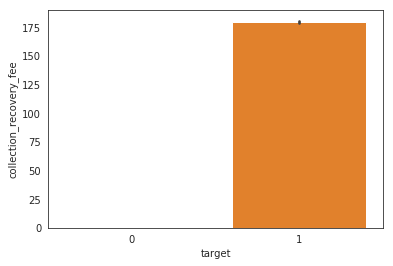

In [94]:
sns.barplot(y='collection_recovery_fee', x='target', data=df)
plt.show()

Well, seems like this is direct indicator if someone defaulted or not - recovery fee is charged for not paying off loan. I should drop any variables regarding to recoveries.

In [29]:
recoveries_vars = ['recoveries', 'collection_recovery_fee', 'debt_settlement_flag', 'total_rec_late_fee']

In [28]:
df.policy_code.unique()

array([1])

In [30]:
df.drop('policy_code', axis=1, inplace=True)

Last payment amount - is it 0 if target = 1?

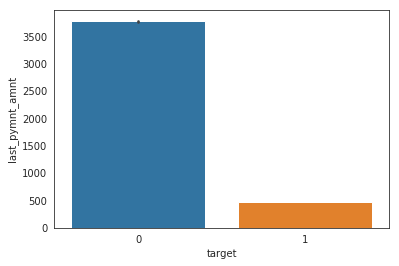

In [30]:
sns.barplot(y='last_pymnt_amnt', x='target', data=df)
plt.show()

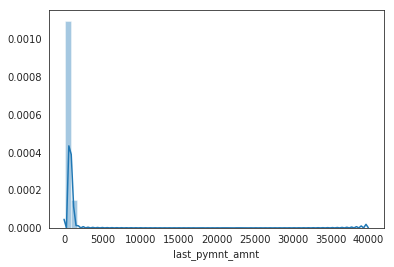

In [44]:
sns.distplot(df[['last_pymnt_amnt', 'target']][df['target']==1]['last_pymnt_amnt'])
plt.show()

In [37]:
last_pymnt_one = df.query('target==1')['last_pymnt_amnt']

In [40]:
last_pymnt_one.apply(lambda x: 1 if x>0.00 else 0).value_counts()

1    281915
0      2429
Name: last_pymnt_amnt, dtype: int64

In [47]:
last_pymnt_one.apply(np.log).apply(lambda x: 1 if x>0 else 0).value_counts()

1    281801
0      2543
Name: last_pymnt_amnt, dtype: int64

In [2]:
from stats import skewness, kurtosis

In [51]:
skewness(last_pymnt_one), kurtosis(last_pymnt_one)

(24.761747756219542, 994.2753103954642)

In [52]:
last_pymnt_zero = df.query('target==0')['last_pymnt_amnt']

In [53]:
skewness(last_pymnt_zero), kurtosis(last_pymnt_zero)

(2.381196700572967, 5.995232784570369)

Incredibly skewed for 1 as well as still skewed for 0. So last payment is rarely a zero but is it lower than installment?

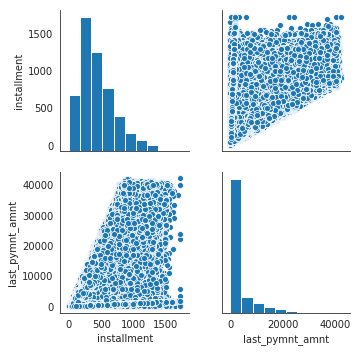

In [30]:
sns.pairplot(df[['installment', 'last_pymnt_amnt']])
plt.show()

In [35]:
df['last_pymnt_amnt_log'] = df['last_pymnt_amnt'].apply(np.log)

In [36]:
df.drop('last_pymnt_amnt', axis=1, inplace=True)

In [31]:
df.drop(recoveries_vars, axis=1, inplace=True)

In [32]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'annual_inc', 'pymnt_plan', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_re

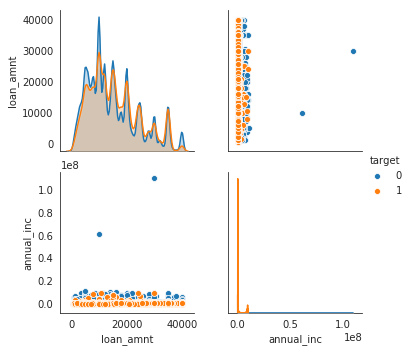

In [41]:
sns.pairplot(df, vars=['loan_amnt', 'annual_inc'], hue='target')

Two outliers, when it comes to annual income.

In [42]:
df['annual_inc_log'] = df.annual_inc.apply(np.log)

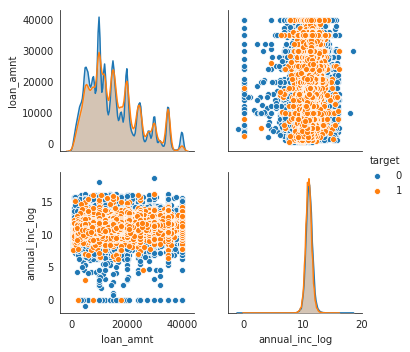

In [43]:
sns.pairplot(df, vars=['loan_amnt', 'annual_inc_log'], hue='target')
plt.show()

In [33]:
df['loan_to_income_ratio'] = np.divide(df.annual_inc, df.loan_amnt)

In [60]:
df.drop('last_pymnt_amnt_log', axis=1, inplace=True)

In [63]:
df.drop('annual_inc_log', axis=1, inplace=True)

<a name='model2'></a>
__5. 2nd Pass - modelling__

In [34]:
y = df.target
X = df.drop('target', axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1582467, 93), (678201, 93), (1582467,), (678201,))

In [37]:
pipe = Pipeline([('rb_sc', RobustScaler())])
X_train_rs = pipe.fit_transform(X_train)

In [38]:
X_test_rs = pipe.transform(X_test)

In [72]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train_rs, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
roc_auc_score(y_train, rf.predict(X_train_rs))

0.9898070083701931

In [73]:
pred = rf.predict(X_test_rs)
print('ROC AUC score {:.4f} '.format(roc_auc_score(y_test, pred)))
print(classification_report(y_test, pred))

ROC AUC score 0.9499 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    592537
           1       1.00      0.90      0.95     85664

   micro avg       0.99      0.99      0.99    678201
   macro avg       0.99      0.95      0.97    678201
weighted avg       0.99      0.99      0.99    678201



In [87]:
rf1_predict_proba = rf.predict_proba(X_test_rs)

In [90]:
rf1_fpr, rf1_tpr, _ = roc_curve(y_test, rf1_predict_proba[:, 1], drop_intermediate=True)

In [39]:
import time

In [87]:
tic = time.time()
result = print_score(rf, X_train_rs, y_train, X_test_rs, y_test, train=True)
toc = time.time()
print('{}'.format(time.strftime("%H:%M:%S" , time.gmtime(toc - tic) )))

Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1383787
           1       1.00      0.98      0.99    198680

   micro avg       1.00      1.00      1.00   1582467
   macro avg       1.00      0.99      0.99   1582467
weighted avg       1.00      1.00      1.00   1582467


Confusion Matrix: 
 [[1383787       0]
 [   4315  194365]]

Average ROC AUC score: 	 0.9674
ROC AUC score std: 		 0.0009


TypeError: 'module' object is not callable

In [96]:
tic = time.time()
result = print_score(rf, X_train_rs, y_train, X_test_rs, y_test, train=False)
toc = time.time()
print('{}'.format(time.strftime("%H:%M:%S" , time.gmtime(toc - tic) )))

Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    592537
           1       1.00      0.89      0.94     85664

   micro avg       0.99      0.99      0.99    678201
   macro avg       0.99      0.95      0.97    678201
weighted avg       0.99      0.99      0.99    678201


Confusion Matrix: 
 [[592510     27]
 [  9165  76499]]

00:00:05


Ok, so it's not so bad but 0.89 recall compared to 0.98 is quite a drop - case of overfitting.

In [101]:
feature_labels = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


for f in range(len(feature_labels)):
    print('{} - {} - {}'.format(f + 1, feature_labels[indices[f]], importances[indices[f]]))
    

1 - total_rec_prncp - 0.21214452308021903
2 - out_prncp_inv - 0.10418647041865667
3 - out_prncp - 0.1023350181145195
4 - funded_amnt - 0.10210679199288142
5 - total_pymnt_inv - 0.0836580486199311
6 - total_pymnt - 0.06846981176347607
7 - loan_amnt - 0.046497628102473834
8 - funded_amnt_inv - 0.03549714228328323
9 - total_rec_int - 0.03156071491499139
10 - installment - 0.02552180728822534
11 - loan_to_income_ratio - 0.020034355483719186
12 - int_rate - 0.013137283932071375
13 - grade - 0.012269487459287319
14 - term - 0.00572408059993798
15 - annual_inc - 0.005223844517838035
16 - dti - 0.0049027143344001125
17 - bc_open_to_buy - 0.004664765750757198
18 - avg_cur_bal - 0.004358770710691314
19 - total_rev_hi_lim - 0.004323275763404475
20 - tot_hi_cred_lim - 0.004305673386819057
21 - total_bc_limit - 0.004221530726499235
22 - mo_sin_old_rev_tl_op - 0.0041871562705145925
23 - revol_bal - 0.004126871390342765
24 - total_bal_ex_mort - 0.004122199965819009
25 - revol_util - 0.004109377128144

Seems like variables are ok. I will fit MLP Classifier to compare and decrease number of features for Random Forest to stop overfitting.

In [40]:
from sklearn.neural_network import MLPClassifier

In [92]:
# neural network classifier with few layers
nn = MLPClassifier(hidden_layer_sizes=(5, 5, 5)\
                   , activation='relu', alpha=0.0001\
                   , learning_rate='adaptive', random_state=42)


In [93]:
nn.fit(X_train_rs, y_train)
nn_predict = nn.predict(X_test_rs)
print(roc_auc_score(nn_predict, y_test))

0.9935256124653258


In [107]:
print(roc_auc_score(y_train, nn.predict(X_train_rs)))

0.95641580777984


In [104]:
print(roc_auc_score(y_test, nn_predict))

0.9562347977198455


In [95]:
print(classification_report(y_test, nn_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    592537
           1       1.00      0.91      0.95     85664

   micro avg       0.99      0.99      0.99    678201
   macro avg       0.99      0.96      0.97    678201
weighted avg       0.99      0.99      0.99    678201



In [98]:
nn_predict_proba = nn.predict_proba(X_test_rs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_predict_proba[:, 1])

Results of MLP are quite similar to RF. Because RF has less parameters to optimize it should be easier (faster) to fine-tune.

In [111]:
rf3 = RandomForestClassifier(n_estimators=10, random_state=42, max_features=20, n_jobs=3)
rf3.fit(X_train_rs, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=3,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [112]:
pred = rf3.predict(X_test_rs)
print('ROC AUC score {:.3f} '.format(roc_auc_score(y_test, pred)))
print(classification_report(y_test, pred))

ROC AUC score 0.960 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    592537
           1       1.00      0.92      0.96     85664

   micro avg       0.99      0.99      0.99    678201
   macro avg       0.99      0.96      0.98    678201
weighted avg       0.99      0.99      0.99    678201



Hyperparameter tuning of Random Forest Classifier.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = [
    {'n_estimators':[5, 10, 20], 'max_features':[10, 15, 20], 'max_depth':[5, 10, 15]
    }
]

In [61]:
import time
tic = time.time()

In [44]:
tic = time.time()
grid_RF = RandomForestClassifier()
grid_search = GridSearchCV(grid_RF, param_grid, cv=3, n_jobs=2
                           , scoring='roc_auc', return_train_score=True, pre_dispatch=2)
grid_search.fit(X_train_rs, y_train)
toc = time.time()

In [45]:
print('{}'.format(time.strftime("%H:%M:%S" , time.gmtime(toc - tic) )))

01:44:32


In [47]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_depth': 15, 'max_features': 20, 'n_estimators': 20}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [48]:
grid_pred = grid_search.best_estimator_.predict(X_test_rs)
print(classification_report(y_test, grid_pred))
print(confusion_matrix(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    592537
           1       1.00      0.91      0.96     85664

   micro avg       0.99      0.99      0.99    678201
   macro avg       0.99      0.96      0.97    678201
weighted avg       0.99      0.99      0.99    678201

[[592515     22]
 [  7302  78362]]


In [109]:
print('Train ROC AUC score after grid search is {:.3f} '.format(roc_auc_score(y_train, grid_search.best_estimator_.predict(X_train_rs))))

Train ROC AUC score after grid search is 0.959 


In [51]:
print('Test ROC AUC score after grid search is {:.3f} '.format(roc_auc_score(y_test, grid_pred)))

Test ROC AUC score after grid search is 0.957 


In [57]:
grid_pred_proba = grid_search.best_estimator_.predict_proba(X_test_rs)

In [61]:
grid_search.best_estimator_.classes_

array([0, 1])

In [60]:
grid_pred_proba

array([[9.98322317e-01, 1.67768323e-03],
       [9.88082027e-01, 1.19179728e-02],
       [9.99855684e-01, 1.44315918e-04],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [8.94296245e-02, 9.10570375e-01],
       [9.85018496e-01, 1.49815044e-02]])

In [70]:
#pred_prob_rf3 = rf3.predict_proba(X_test_rs)
fpr, tpr, _ = roc_curve(y_test, grid_pred_proba[:, 1], pos_label = 1, drop_intermediate=True)

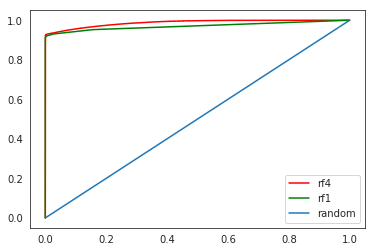

In [91]:
plt.plot(rf1_fpr, rf1_tpr, label='rf1', color='green')
plt.plot(fpr, tpr, label='rf4', color='red')

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), label='random')
plt.legend()
plt.show()

<a name='summary'></a>
__6. Summary - Loan Defaults Prediction__

_6.1 Introduction_  
Lending Club is platform for connecting borrowers and investors, providing access to money for former and opportunity for profit for latter.  
Task at hand involves creating model predicting probability of loan default and through it help investors avoid unnecessary risks.

_6.2 Dataset decription_  
Provided dataset consisted of 2 260 668 observations and 145 variables. Target variable was "loan type", consisting of few descriptive categories, which transformed into two states indicated if loan defaulted or was fully paid. 12.57% of observations belonged to category "default", other 87.43% were "fully paid".  
Out of 145 variables a few were direct indicators of loan status that were post-event features, thus were removed from dataset. 

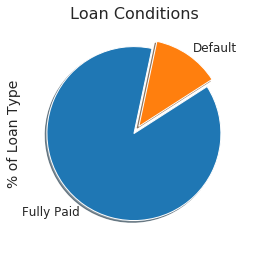

In [84]:
df.target.value_counts().plot.pie(explode=[0, 0.1], startangle=78, labels=['Fully Paid', 'Default'], fontsize=12, shadow=True)
plt.title('Loan Conditions', fontsize=16)
plt.ylabel('% of Loan Type', fontsize=14)
plt.show()

_6.3 Model comparison_  
Base evaluation metric for models was ROC/AUC score - Receiver Operating Characterstic and Area Under Curve. Based on the fact that dataset was imbalanced, consisting of only 12.5% positive events, F1-Score and Recall were also taken into consideration in model selection.  

In modeling process first used algorithm was Random Forest Classifier ('_rf1_'), which proved to be quite adequate - reached 0.949 ROC/AUC score, 0.89 recall and 0.94 F1-Score on test set, however on train data it had 0.989 ROC/AUC score indicating overfitting.  

Second used algorithm was a Neural Network, reaching 0.956 ROC/AUC on both training and test sets - indicating great generalization capabilities. Recall for this model had value of 0.91 and F1-score - 0.95, both better than results of Random Forest.  

Third used algorithm was again Random Forest Classifier, however this time with different hyperparameter values to combat overfitting, which were an effect of grid search. Model reached 0.957 ROC/AUC score on training set and 0.956 ROC/AUC score on test set which indicates a lot better generalization than first model and almost the same as Neural Network model. However model reached better values of Recall and F-1 score - 0.91 and 0.96 respectively, which indicates that it's best suited for this predictive task.

|  Model   | ROC/AUC | Recall | F1-Score |
|----------|:-------:|:------:|:--------:|  
| Random Forest | 0.949| 0.89| 0.94|
|Neural Network |0.956 | 0.91 | 0.95|
|2nd Random Forest| 0.956| 0.91 | 0.96 |

Above table presents comparison of metrics for evaluated models on test set.

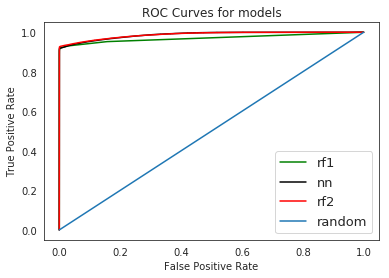

In [112]:
plt.plot(rf1_fpr, rf1_tpr, label='rf1', color='green')
plt.plot(nn_fpr, nn_tpr, label='nn', color='black')
plt.plot(fpr, tpr, label='rf2', color='red')
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), label='random')
plt.title('ROC Curves for models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(fontsize=13)
plt.show()

Above figure presents ROC Curves for tested models. Second Random Forest Classifier and Neural Network perform very closely.